In [115]:
import numpy as np
%load_ext autoreload
%autoreload 2
import dsp_lib
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [116]:
def upscale_to_i16(signal):
    max_i16 = 32767
    print(max(signal))
    print(max(signal.real))
    print(max(signal.imag))
    coeff = max_i16 / max(max(signal.real), max(signal.imag))
    print(coeff)
    return signal * np.floor(coeff)

def downscale_to_i16(signal):
    max_i16 = 32767
    print(max(signal))
    print(max(signal.real))
    print(max(signal.imag))
    coeff = max_i16 / max(max(signal.real), max(signal.imag))
    print(coeff)
    return signal * (coeff)

In [117]:
file_path = "qpsk_rrc_int16.bin"
data_type = 'int16'

source_samples = dsp_lib.read_signal(file_path, data_type, 0, 0, '')

[[18553]
 [ 6528]
 [-3303]
 [11166]
 [20457]
 [ 6024]
 [-2233]
 [10389]
 [17413]
 [ 5479]]


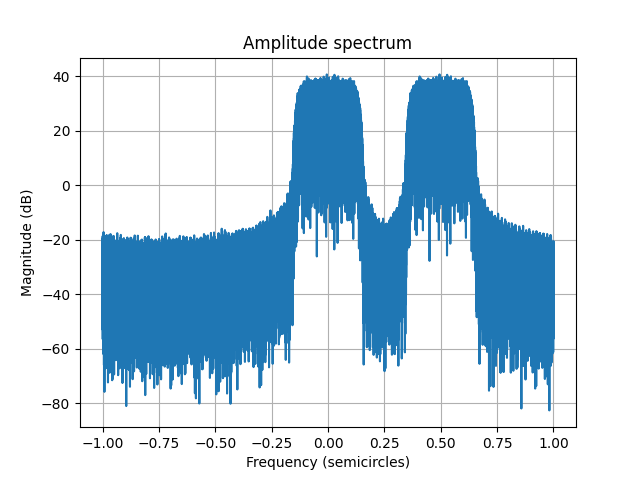

array([[-52.78182226],
       [-25.85354024],
       [-29.23160691],
       ...,
       [-20.55042534],
       [-32.30233844],
       [-27.48130532]])

In [118]:
sig = dsp_lib.make_cmplx_sig(source_samples)
dsp_lib.plot_spectrum(sig, 0)

In [119]:
N = 129
Fs = 1
T_symb = 8
s_rrc = dsp_lib.gen_rrc_filter_impulse_response(N, Fs, T_symb)

[44104.06855703-30678.74022139j 52721.10317825-37242.94990835j
 60083.80145639-43149.8033332j  65656.59252807-48135.16201822j
 69011.36349227-52333.15866705j 70188.45674543-56070.13532562j
 69503.80056819-59506.14229861j 67260.59104547-62754.711477j
 63881.05633382-66021.85026881j 60017.44145705-69389.37199477j]
[-40554.94272799-22311.26296839j -51360.95186683-42302.19663249j
 -58133.44895398-57982.82789026j -60643.38065721-68029.43432102j
 -58972.6737776 -71804.03280744j -53690.40610871-69377.56161802j
 -45752.75560664-61671.36480638j -36145.65067192-50220.20435207j
 -25855.72983081-36683.53683096j -15980.95512659-22739.93511868j]


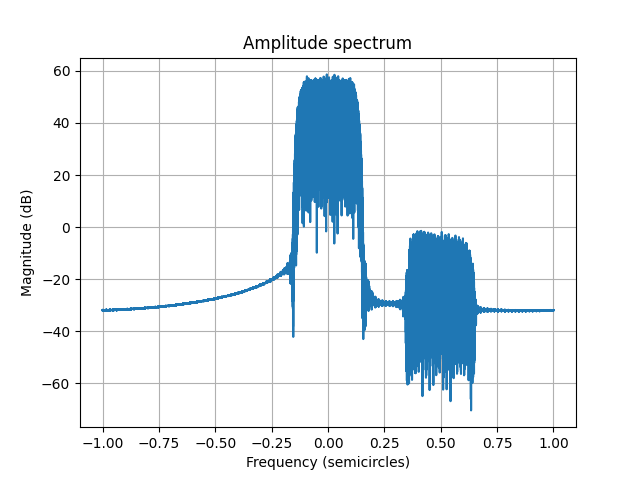

In [120]:
sig_rrc = np.convolve(sig, s_rrc, 'same')
print(sig_rrc[:10])
print(sig_rrc[len(sig_rrc) - 10:])
dsp_lib.plot_spectrum(sig_rrc, 1)
dsp_lib.save_cmplx_sig(sig_rrc, "qpsk_rrc_after_py_rrc_fl64.bin", 'float64')

In [121]:
#!!!!!!!!!!!!!!!!!!!
sig_len = len(sig)
rrc_len = len(s_rrc)
rrc_len_corr = int(np.floor(rrc_len / 2) * 2)

conv_len = int( sig_len / 2 + rrc_len_corr )
conv_buf = np.zeros((conv_len, ), complex)

sig0 = sig[: int(np.floor(sig_len / 2))]
conv_buf[rrc_len_corr : conv_len] = sig0
print(conv_buf[125:132])

[    0.    +0.j     0.    +0.j     0.    +0.j 18553. -6679.j
  6528. +3218.j -3303.-10497.j 11166.-20183.j]


In [122]:
print(f"sig len = {sig_len}, rrc len = {rrc_len}")

print(f"sig0 shape = {sig0.shape}, conv buf shape = {conv_buf.shape}")

sig_rrc0 = np.convolve(conv_buf, s_rrc, 'same')
#!!!!!!!!!!!!!!!!!!!
conv_buf[:rrc_len_corr] = conv_buf[conv_len - rrc_len_corr :]
#!!!!!!!!!!!!!!!!!!!
sig1 = sig[int(np.floor(sig_len / 2) ) : (sig_len)]
conv_buf[rrc_len_corr : conv_len] = sig1

sig_rrc1 = np.convolve(conv_buf, s_rrc, 'same')
print(f"sig rrc0.len = {len(sig_rrc0)}, sig_rrc1.len = {len(sig_rrc1)}")
#!!!!!!!!!!!!!!!!!!!
sum_sig_rrc = np.hstack((sig_rrc0[ rrc_len_corr : int(len(sig_rrc0) - np.floor(rrc_len_corr / 2))], sig_rrc1[int(rrc_len_corr / 2) : len(sig_rrc1) - int(rrc_len_corr / 2)]))
print(f"sum sig rrc len = {len(sum_sig_rrc)}")
diff = sig_rrc[: int( len(sig_rrc) - rrc_len_corr / 2)] - sum_sig_rrc
print(f"max diff of partional convs is {max(diff)}")

sig len = 1032000, rrc len = 129
sig0 shape = (516000,), conv buf shape = (516128,)
sig rrc0.len = 516128, sig_rrc1.len = 516128
sum sig rrc len = 1031936
max diff of partional convs is (2.9103830456733704e-11-7.275957614183426e-12j)


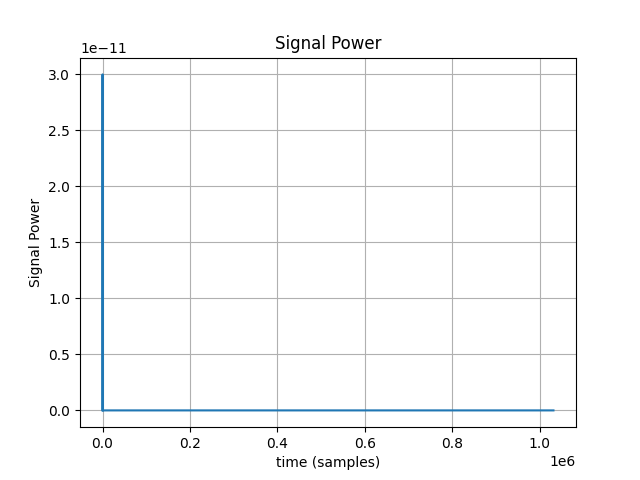

In [123]:
dsp_lib.plot_signal(abs(diff), 5)

In [124]:
print(sum_sig_rrc[0 : 10])

[44104.06855703-30678.74022139j 52721.10317825-37242.94990835j
 60083.80145639-43149.8033332j  65656.59252807-48135.16201822j
 69011.36349227-52333.15866705j 70188.45674543-56070.13532562j
 69503.80056819-59506.14229861j 67260.59104547-62754.711477j
 63881.05633382-66021.85026881j 60017.44145705-69389.37199477j]


In [125]:
print(sig_rrc0[127 : 132])

[34680.72345406-23764.28955958j 44104.06855703-30678.74022139j
 52721.10317825-37242.94990835j 60083.80145639-43149.8033332j
 65656.59252807-48135.16201822j]


In [126]:
print(sig_rrc[0:10])

[44104.06855703-30678.74022139j 52721.10317825-37242.94990835j
 60083.80145639-43149.8033332j  65656.59252807-48135.16201822j
 69011.36349227-52333.15866705j 70188.45674543-56070.13532562j
 69503.80056819-59506.14229861j 67260.59104547-62754.711477j
 63881.05633382-66021.85026881j 60017.44145705-69389.37199477j]


In [127]:
a = np.full(6, 2)
b = np.full(6, 4)
ab = np.hstack((a, b))
print(ab.shape)

(12,)


In [128]:
int(len(sig0) - np.floor(rrc_len / 2) -1)
int(rrc_len / 2)

64

In [129]:
sig_fl32 = np.array(sig,  dtype=np.csingle)
s_rrc_fl32 = np.array(s_rrc, dtype = np.float32)
sig_rrc_fl32 = np.convolve(sig_fl32, s_rrc_fl32, 'same')
print(sig_rrc_fl32[len(sig_rrc_fl32) - 10:])
dsp_lib.save_cmplx_sig(sig_rrc_fl32, "qpsk_rrc_after_py_rrc_fl32.bin", data_type='float32')
dsp_1032000,lib.plot_spectrum(sig_rrc_fl32, 2)
print(s_rrc[:4])
print(s_rrc_fl32[:4])
print(type(s_rrc[0]))
print(s_rrc[0] - s_rrc_fl32[0])

[-40554.94 -22311.266j -51360.945-42302.195j -58133.45 -57982.83j
 -60643.383-68029.43j  -58972.676-71804.03j  -53690.414-69377.56j
 -45752.758-61671.367j -36145.652-50220.207j -25855.73 -36683.54j
 -15980.955-22739.936j]


NameError: name 'dsp_1032000' is not defined

In [ ]:
sig_rrc_scaled = downscale_to_i16(sig_rrc)
max(sig_rrc_scaled)

In [ ]:
max(sig_rrc)

In [ ]:
sig_rrc[-10:]

In [ ]:
len(sig_rrc_fl32)